In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_meta=pd.read_csv('/content/gdrive/MyDrive/signal.csv')
train_meta.head()

,Unnamed: 0,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11,NORM,MI,STTC,HYP,CD
0,0,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079,1,0,0,0,0
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074,1,0,0,0,0
2,2,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069,1,0,0,0,0
3,3,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064,1,0,0,0,0
4,4,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058,1,0,0,0,0


In [ ]:
train_meta=train_meta.iloc[:,:13]

In [ ]:
train_meta.head()

,Unnamed: 0,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,0,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,2,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,3,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,4,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058


In [ ]:
print(train_meta.shape)
train_meta.isnull().sum()[train_meta.isnull().sum()>0]

(21837000, 13)


Series([], dtype: int64)

In [ ]:
train_meta.head()

,Unnamed: 0,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,0,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,2,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,3,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,4,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058


In [ ]:
train_meta['age'].replace(np.nan,train_meta.age.median(),inplace=True)#median represents the middle value , and number of missing value is also very less so filling the missing value with median is good choice
train_meta['height'].replace(np.nan,train_meta.height.mean(),inplace=True)
train_meta['weight'].replace(np.nan,train_meta.weight.mean(),inplace=True)
train_meta['nurse'].replace(np.nan,train_meta.nurse.mode()[0],inplace=True)#assuming that missing places of nurse can be filled with the nurse code who measured the most
train_meta['site'].replace(np.nan,train_meta.site.mode()[0],inplace=True)#as number of missing values were very less so we can fill those with the most frequently occuring value hence the distribution will not be affected
train_meta['device']=train_meta.device.map(dict(train_meta.device.value_counts()))#string values cannot be evaluated in classifiers so i transformed it into the value count of that specific entry

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
model_norm=RFC(random_state=100)
model_mi=RFC(random_state=100)
model_sttc=RFC(random_state=100)
model_hyp=RFC(random_state=100)
model_cd=RFC(random_state=100)

In [ ]:
X=train_meta.iloc[:,1:8]
y_norm=train_meta['NORM']
y_mi=train_meta['MI']
y_sttc=train_meta['STTC']
y_hyp=train_meta['HYP']
y_cd=train_meta['CD']

In [ ]:
model_norm.fit(X,y_norm)
model_sttc.fit(X,y_sttc)
model_mi.fit(X,y_mi)
model_hyp.fit(X,y_hyp)
model_cd.fit(X,y_cd)

RandomForestClassifier(random_state=100)

In [ ]:
valid_meta=pd.read_csv('/content/drive/MyDrive/Datasets/PTB XL/valid_meta.csv')
valid_meta.head()

,ecg_id,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,HYP,CD,sub_NORM,sub_IMI,sub_STTC,sub_NST_,sub_LVH,sub_LAFB/LPFB,sub_RVH,sub_RAO/RAE,sub_IRBBB,sub_IVCD,sub_LMI,sub_AMI,sub_ISCA,sub__AVB,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
0,8,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,10,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,17,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,18,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
4,20,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
valid_meta=valid_meta.iloc[:,:13]
valid_meta['age'].replace(np.nan,valid_meta.age.median(),inplace=True)#median represents the middle value , and number of missing value is also very less so filling the missing value with median is good choice
valid_meta['height'].replace(np.nan,valid_meta.height.mean(),inplace=True)
valid_meta['weight'].replace(np.nan,valid_meta.weight.mean(),inplace=True)
valid_meta['nurse'].replace(np.nan,valid_meta.nurse.mode()[0],inplace=True)#assuming that missing places of nurse can be filled with the nurse code who measured the most
valid_meta['site'].replace(np.nan,valid_meta.site.mode()[0],inplace=True)#as number of missing values were very less so we can fill those with the most frequently occuring value hence the distribution will not be affected
valid_meta['device']=valid_meta.device.map(dict(valid_meta.device.value_counts()))#string values cannot be evaluated in classifiers so i transformed it into the value count of that specific entry

In [ ]:
valid_meta.isnull().sum()

ecg_id    0
age       0
sex       0
height    0
weight    0
nurse     0
site      0
device    0
NORM      0
MI        0
STTC      0
HYP       0
CD        0
dtype: int64

In [ ]:
valid_X=valid_meta.iloc[:,1:8]
pred_norm=model_norm.predict(valid_X)
pred_sttc=model_sttc.predict(valid_X)
pred_mi=model_mi.predict(valid_X)
pred_hyp=model_hyp.predict(valid_X)
pred_cd=model_cd.predict(valid_X)

In [ ]:
pred=pd.DataFrame({'NORM':pred_norm,'MI':pred_mi,'STTC':pred_sttc,'HYP':pred_hyp,'CD':pred_cd})
print('The prediction of the validation dataset')
pred.head()

The prediction of the validation dataset


,NORM,MI,STTC,HYP,CD
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [ ]:
print('the actual validation data')
valid_meta.iloc[:5,8:]

the actual validation data


,NORM,MI,STTC,HYP,CD
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [ ]:
# Accuracy check
from sklearn.metrics import confusion_matrix
for col in pred:
  print('Confusion matrix for ',col)
  print(confusion_matrix(valid_meta[col],pred[col]))

Confusion matrix for  NORM
[[790 446]
 [284 673]]
Confusion matrix for  MI
[[1592   57]
 [ 514   30]]
Confusion matrix for  STTC
[[1561   98]
 [ 485   49]]
Confusion matrix for  HYP
[[1919    3]
 [ 271    0]]
Confusion matrix for  CD
[[1651   45]
 [ 453   44]]


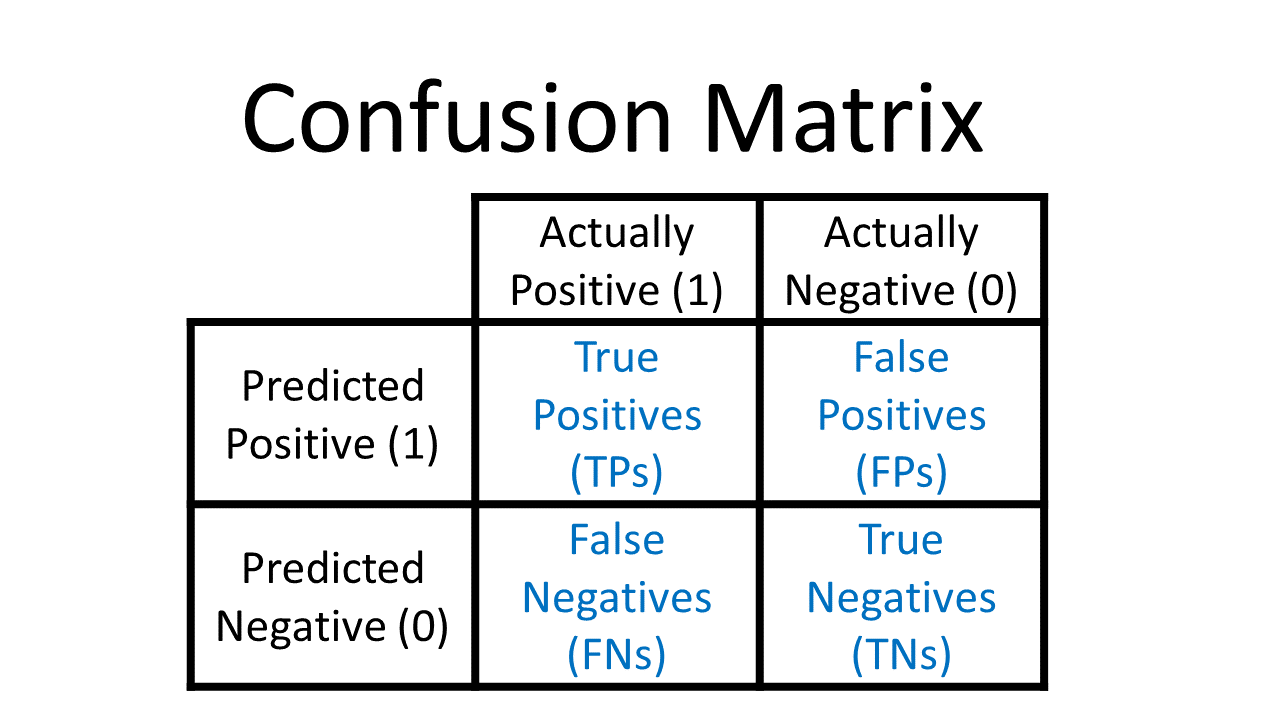

In [ ]:
import pandas as pd
signals=pd.read_csv('/content/drive/MyDrive/Datasets/PTB XL/signal.csv')
signals.head()

,Unnamed: 0,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11,NORM,MI,STTC,HYP,CD
0,0,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079,1,0,0,0,0
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074,1,0,0,0,0
2,2,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069,1,0,0,0,0
3,3,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064,1,0,0,0,0
4,4,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058,1,0,0,0,0


In [ ]:
signals.shape

(21837000, 18)

In [ ]:
signals.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
import pickle

In [ ]:
# norm-17, mi-13, sttc-7, hyp-3 , cd-2
for i in range(21827000,len(signals)):
  if signals['NORM'][i]==1: signals['NORM'][i]=17
  if signals['MI'][i]==1 : signals['MI'][i]=13
  if signals['STTC'][i]==1 : signals['STTC'][i]=7
  if signals['HYP'][i]==1 : signals['HYP'][i]=3
  if signals['CD'][i]==1 : signals['CD'][i]=2

for i in range(100000):
  if signals['NORM'][i]==1: signals['NORM'][i]=17
  if signals['MI'][i]==1 : signals['MI'][i]=13
  if signals['STTC'][i]==1 : signals['STTC'][i]=7
  if signals['HYP'][i]==1 : signals['HYP'][i]=3
  if signals['CD'][i]==1 : signals['CD'][i]=2

In [ ]:
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=signals.iloc[:21827001,:11],signals.iloc[21827001:,:11],signals.iloc[:21827001,-5:],signals.iloc[21827001:,-5:]

In [ ]:
y_train['Category']=y_train['NORM']+y_train['MI']+y_train['STTC']+y_train['HYP']+y_train['CD']
y_test['Category']=y_test['NORM']+y_test['MI']+y_test['STTC']+y_test['HYP']+y_test['CD']
y_test.head()

,NORM,MI,STTC,HYP,CD,Category
21827000,0,13,7,0,0,20
21827001,0,13,7,0,0,20
21827002,0,13,7,0,0,20
21827003,0,13,7,0,0,20
21827004,0,13,7,0,0,20


In [ ]:
y_train=y_train.Category
y_train.head()

0    17
1    17
2    17
3    17
4    17
Name: Category, dtype: int64

In [ ]:
y_test=y_test.Category
y_test.head()

21827000    20
21827001    20
21827002    20
21827003    20
21827004    20
Name: Category, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
model=rfc(random_state=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual category'], colnames=['Predicted category']))

Predicted category  0   2   3   5   7   9   13  15    17  20
Actual category                                             
2                    4   2   0   5   1   0   0   0   988   0
7                    0   3   0   0   0   0   0  15  1977   5
17                   4  42  23   0   2   2   1  10  4915   1
19                   6   9   0   0   0   1   0   0   984   0
20                   6   1   0   0   0  10   0   0   983   0


In [ ]:
pickle.dump(model,open('/content/drive/MyDrive/Datasets/PTB XL/model.sav','wb'))

In [ ]:
import pickle
model=pickle.load(open('model.sav','rb'))

In [ ]:
pd.Series(model.predict(X_test)).unique()

array([17,  9,  0,  2,  3, 13, 15,  7,  5, 20])